In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Exploratory Data Analysis

Reading in the cleaned data file
All movies were:
Made in USA, 
In English, 
From 1990 - 2020, 
More than 500 reviews, 

with no NAN values

In [ ]:
df = pd.read_csv("/content/IMDb_clean.csv",usecols= [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17] )

In [ ]:
df

,title,year,genre,duration,country,language,director,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,votecat
0,Fuoco assassino,1991,"Action, Crime, Drama",137,USA,English,Ron Howard,6.7,70047,40000000,77868585,152368585,38,161,74,High
1,Boyz n the Hood - Strade violente,1991,"Crime, Drama",112,USA,English,John Singleton,7.8,121709,6500000,57504069,57529070,76,236,88,High
2,Bugsy,1991,"Biography, Crime, Drama",136,USA,English,Barry Levinson,6.8,25628,30000000,49114016,49114016,80,77,57,High
3,Cape Fear - Il promontorio della paura,1991,"Crime, Thriller",128,USA,English,Martin Scorsese,7.3,168724,35000000,79091969,182291969,73,329,132,High
4,"Scappo dalla città - La vita, l'amore e le vacche",1991,"Comedy, Western",113,USA,English,Ron Underwood,6.8,47309,27000000,124033791,179033791,70,96,54,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1940,Annabelle 3,2019,"Horror, Mystery, Thriller",106,USA,English,Gary Dauberman,5.9,53649,30000000,74152591,231252591,53,748,229,Middle
1941,The Tax Collector,2020,"Action, Crime, Drama",95,USA,English,David Ayer,4.7,4862,30000000,942666,942666,22,255,47,Middle
1942,Unplanned,2019,"Biography, Drama",109,USA,English,"Chuck Konzelman, Cary Solomon",5.8,12182,6000000,19005109,21171090,10,629,34,Middle
1943,Impractical Jokers: The Movie,2020,Comedy,92,USA,English,Chris Henchy,5.9,4105,3000000,10691091,10691091,39,152,17,Middle


# What does the data look like

In [ ]:
df.shape
# Getting the shape of the data frame

(1945, 16)

In [ ]:
for temp in df['votecat'].unique(): #votecat labels movies with avg_vote<3.3 as low, 3.3<avg_vote<6.6 as middle, and avg_vote>6.6 as high
  print(f"We have {df[df['votecat'] == temp]['votecat'].count()} observations of {temp} movies.")

We have 621 observations of High movies.
We have 1296 observations of Middle movies.
We have 28 observations of Low movies.


# Five Number Summary

In [ ]:
df.describe(percentiles = [.5])
# Five number summary with min, mean, median, standard.dev, and max

,year,duration,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
count,1945.000000,1945.000000,1945.000000,1.945000e+03,1.945000e+03,1.945000e+03,1.945000e+03,1945.000000,1945.000000,1945.000000
mean,2005.966581,103.785090,6.170591,8.577936e+04,3.054834e+07,4.273691e+07,8.493770e+07,50.530591,281.555270,132.304884
std,7.313203,15.582816,0.998728,1.584504e+05,3.962830e+07,7.176198e+07,1.747340e+08,17.449522,492.109321,119.597594
min,1991.000000,63.000000,1.400000,5.020000e+02,1.000000e+04,1.000000e+03,1.000000e+03,1.000000,3.000000,2.000000
50%,2006.000000,101.000000,6.300000,3.255400e+04,1.800000e+07,1.907480e+07,2.547736e+07,50.000000,154.000000,96.000000
max,2020.000000,219.000000,9.300000,2.278845e+06,3.210000e+08,9.366622e+08,2.068224e+09,99.000000,8232.000000,909.000000


# Correlations 

In [ ]:
df.corr()

,year,duration,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
year,1.000000,-0.022294,-0.040230,0.004030,0.051066,0.057271,0.103261,-0.024914,0.041084,0.369486
duration,-0.022294,1.000000,0.360919,0.315389,0.303624,0.295552,0.267475,0.215526,0.323377,0.301268
avg_vote,-0.040230,0.360919,1.000000,0.454023,0.140808,0.260118,0.243646,0.698614,0.287040,0.392010
votes,0.004030,0.315389,0.454023,1.000000,0.442996,0.604233,0.590999,0.339049,0.736426,0.614390
budget,0.051066,0.303624,0.140808,0.442996,1.000000,0.735681,0.760891,0.083143,0.457412,0.509790
usa_gross_income,0.057271,0.295552,0.260118,0.604233,0.735681,1.000000,0.961158,0.217094,0.598037,0.567175
worlwide_gross_income,0.103261,0.267475,0.243646,0.590999,0.760891,0.961158,1.000000,0.198575,0.572963,0.574140
metascore,-0.024914,0.215526,0.698614,0.339049,0.083143,0.217094,0.198575,1.000000,0.226429,0.392367
reviews_from_users,0.041084,0.323377,0.287040,0.736426,0.457412,0.598037,0.572963,0.226429,1.000000,0.574153
reviews_from_critics,0.369486,0.301268,0.392010,0.614390,0.509790,0.567175,0.574140,0.392367,0.574153,1.000000


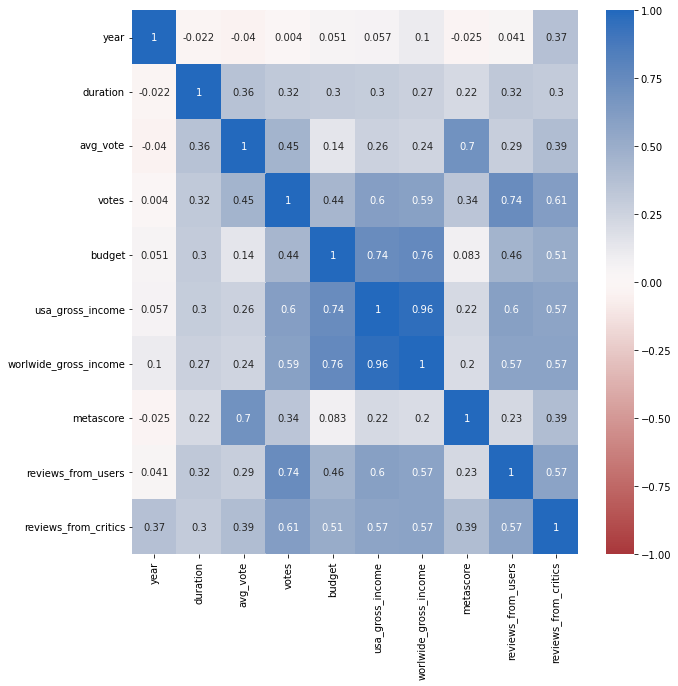

In [ ]:
fig = plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='vlag_r')
# Heat map of the correlations

Some of the predictor variables are highly correlated and should not be used together to predict avg_vote, like usa_gross_income and worlwide_gross_income. A good mix of variables that are correlated to the predictand but not other predictors include: metascore, duration, year, budget, and USA gross income.

In [ ]:
df_five = pd.read_csv("/content/IMDb_clean.csv",usecols= [2, 3, 5, 9, 11, 12, 14] )

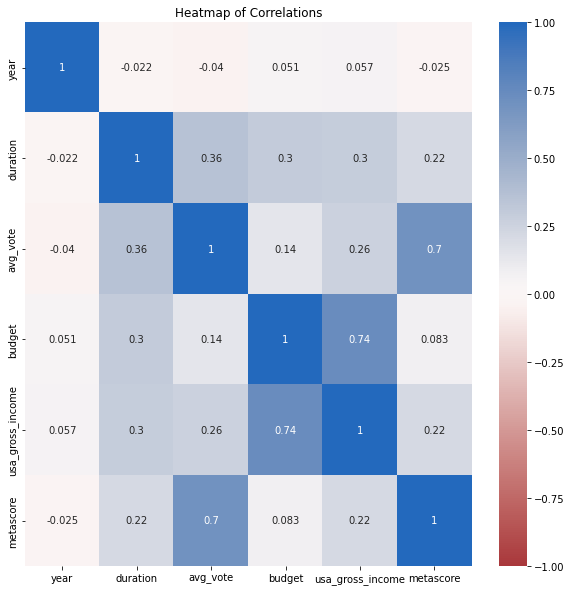

In [ ]:
fig2 = plt.figure(figsize=(10, 10))
ax2 = plt.axes()
sns.heatmap(df_five.corr(), vmin=-1, vmax=1, annot=True, cmap='vlag_r')
ax2.set_title('Heatmap of Correlations')
fig2.savefig('corr_heatmap.png', bbox_inches='tight', dpi=150)
# Heat map of the correlations

# Pair Plots

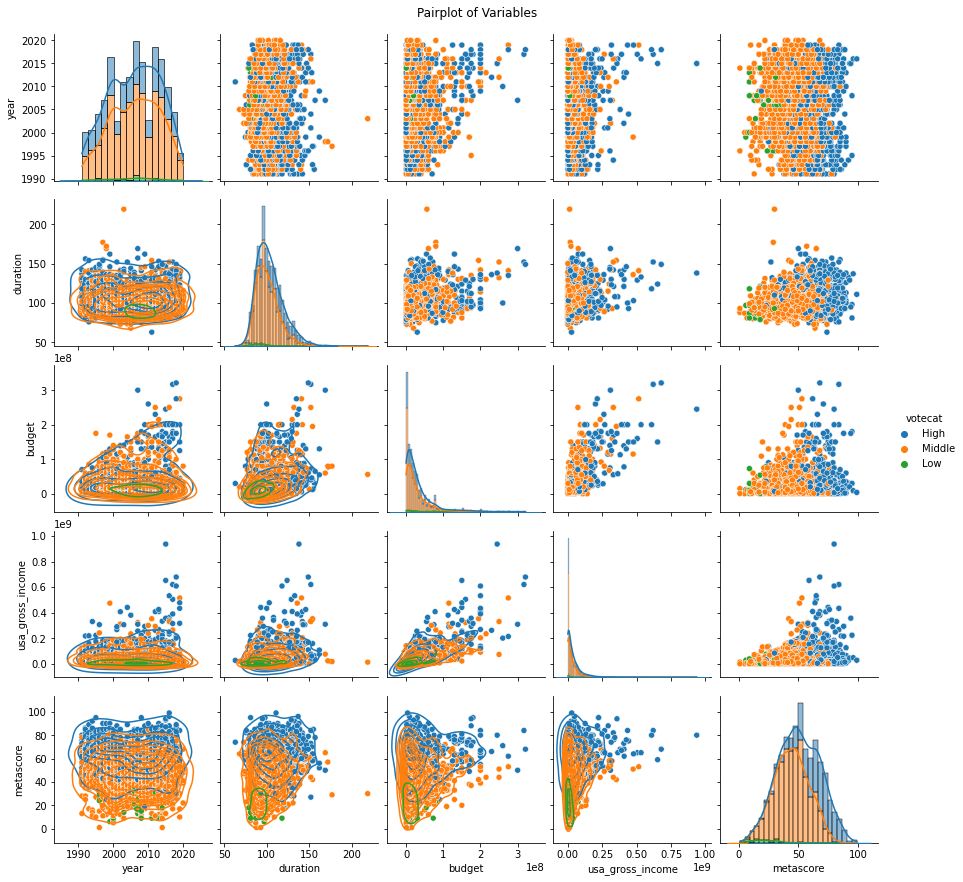

In [ ]:
g = sns.pairplot(df, vars = ['year', 'duration', 'budget', 'usa_gross_income', 'metascore'], hue = 'votecat', diag_kind="kde", height=2.5)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, fill=False)
g.map_diag(sns.histplot, multiple='stack', stat='count', kde=True)
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle("Pairplot of Variables")
g.savefig("Movies_Pairplot.png", bbox_inches='tight', dpi=150);

We will probably want to use the variables metascore and budget to predict movie ratings. In addition the modelling technique we will be using is regression./